About Netflix:

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc

Business Problem:

To analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

 Reading the Data

In [2]:
df=pd.read_csv("netflix.csv")

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Basic Analysis

1) Unnesting the columns

In [4]:
# Storing nested and unnested columns in separate dataframes
unnested_df=df[['show_id','type','title','date_added','release_year','rating','duration']]
nested_df1=df[['title','cast']]
nested_df2=df[['title','listed_in']]
nested_df3=df[['title','director']]
nested_df4=df[['title','country']]

In [5]:
def unnesting(nested_df,nested_text_column):
    """
    This function takes a dataframe with nested column
    and unnests the column

    """
    # Split the values in the nested_text_column using ',' as the delimiter
    nested_df[nested_text_column]=nested_df[nested_text_column].str.split(",")

    # Explode the DataFrame based on the nested_text_column
    unnested_df=nested_df.explode(nested_text_column)

    return unnested_df

In [6]:
# Unnesting the dataframes with nested columns
df1=unnesting(nested_df1,'cast')
df2=unnesting(nested_df2,'listed_in')
df3=unnesting(nested_df3,'director')
df4=unnesting(nested_df4,'country')

In [7]:
# Merging DataFrames df1 and df2 based on the 'title' column
df_12=df1.merge(df2,on='title')

# Merging DataFrames df_12 and df3 based on the 'title' column
df_123=df_12.merge(df3,on='title')

# Merging DataFrames df_123 and df4 based on the 'title' column
df_1234=df_123.merge(df4,on='title')

# Merging the unnested DataFrame and df_1234 based on the 'title' column
df_final=unnested_df.merge(df_1234,on='title')

In [8]:
df_final.head()

,show_id,type,title,date_added,release_year,rating,duration,cast,listed_in,director,country
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,NaN,Documentaries,Kirsten Johnson,United States
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,Ama Qamata,International TV Shows,NaN,South Africa
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,Ama Qamata,TV Dramas,NaN,South Africa
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,Ama Qamata,TV Mysteries,NaN,South Africa
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,Khosi Ngema,International TV Shows,NaN,South Africa


2) Converting date_added and release_year columns to datetime objects

In [9]:
df_final['date_added'] = pd.to_datetime(df_final['date_added'], errors='coerce')
df_final['release_year'] = pd.to_datetime(df_final['release_year'], format='%Y', errors='coerce')

3) Adding a new column 'duration_new' to extract numerical part from duration column

In [10]:
df_final['duration_new']=df_final['duration'].apply(lambda x:int(str(x).split(" ")[0]) if pd.notna(x) else 0)

4) Handling Null Values

In [11]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   type          202065 non-null  object        
 2   title         202065 non-null  object        
 3   date_added    200319 non-null  datetime64[ns]
 4   release_year  202065 non-null  datetime64[ns]
 5   rating        201998 non-null  object        
 6   duration      202062 non-null  object        
 7   cast          199916 non-null  object        
 8   listed_in     202065 non-null  object        
 9   director      151422 non-null  object        
 10  country       190168 non-null  object        
 11  duration_new  202065 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 18.5+ MB


In [ ]:
# Forward filling the missing values in 'date_added' column
df_final['date_added'].fillna(method='ffill',inplace=True)

In [ ]:
# Filling the missing values in categorical columns
df_final['director'] =df_final['director'].replace("","Unknown Director").fillna("Unknown Director")
df_final['country'] = df_final['country'].replace("", "Unknown Country").fillna("Unknown Country")
df_final['cast'] = df_final['cast'].replace("", "Unknown Actor").fillna("Unknown Actor")
df_final['rating'] = df_final['rating'].replace("","Unknown Rating").fillna("Unknown Rating")

5) Stripping Leading and Trailing Spaces For Categorical Columns

In [ ]:
cat_cols=['type','title','rating','cast','listed_in','director','country']
for col in cat_cols:
    df_final[col]=df_final[col].str.strip()

#Exploratory Analysis and Insights

 # 1. Find the counts of each categorical variable both using graphical and nongraphical analysis.

a) Type column

In [ ]:
type_counts = df_final['type'].value_counts()
type_percentages = (type_counts / type_counts.sum()) * 100
print(type_percentages)

type
Movie      72.212902
TV Show    27.787098
Name: count, dtype: float64


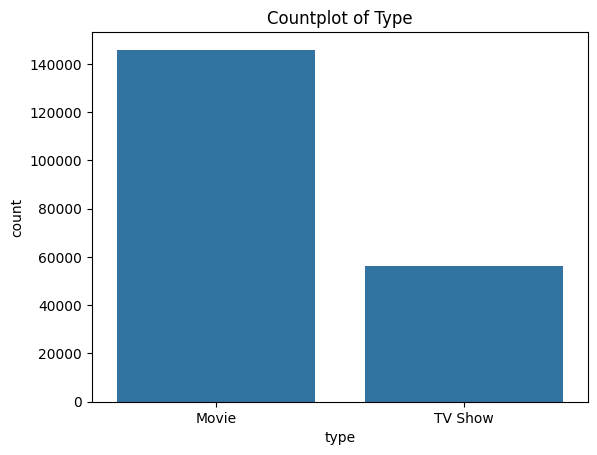

In [ ]:
# Creating a countplot for the 'type' column
sns.countplot(data=df_final,x='type')
plt.title("Countplot of Type")
plt.show()

Observation: The dataset contains about 72% movies and 28% TV-shows

b) Rating column

In [ ]:
rating_counts=df_final['rating'].value_counts()
rating_percentages = (rating_counts / rating_counts.sum()) * 100
print(rating_percentages)

rating
TV-MA             36.579813
TV-14             21.753891
R                 12.797862
PG-13              8.039987
TV-PG              7.386732
PG                 5.403707
TV-Y7              3.119788
TV-Y               1.813773
TV-G               1.375300
NR                 0.778462
G                  0.757182
NC-17              0.073739
TV-Y7-FV           0.042561
UR                 0.042561
Unknown Rating     0.033158
74 min             0.000495
84 min             0.000495
66 min             0.000495
Name: count, dtype: float64


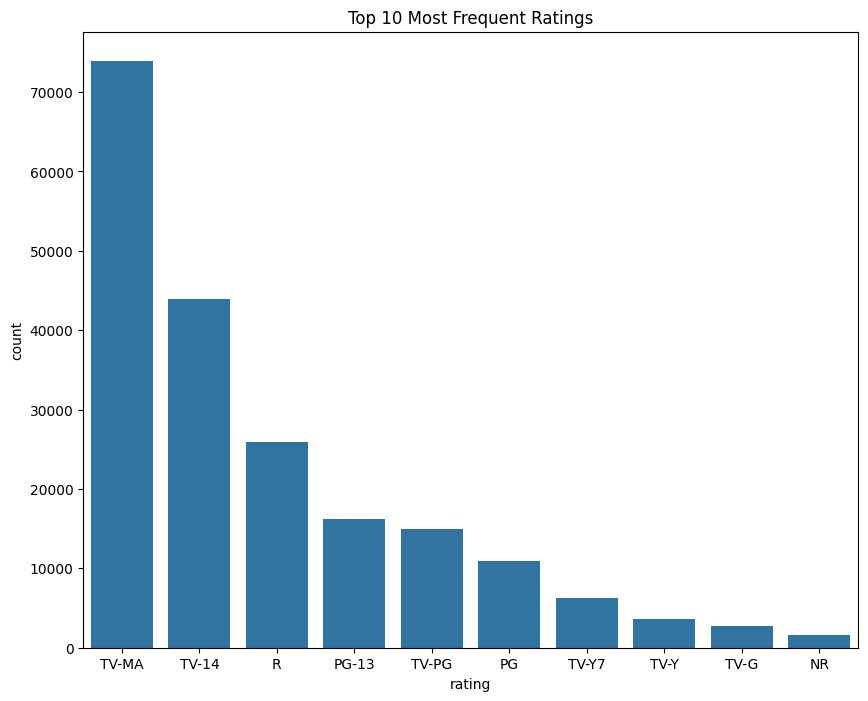

In [ ]:
# Creating a countplot for the top 10 most frequent ratings
plt.figure(figsize=(10,8))
sns.countplot(data=df_final,x='rating',order=df_final['rating'].value_counts()[:10].index)
plt.title("Top 10 Most Frequent Ratings")
plt.show()

Observation: 'TV-MA' is the most frequent rating, with about 36% of the movies and TV shows having a 'TV-MA' rating.

c) Listed_in column

In [ ]:
genre_counts=df_final['listed_in'].value_counts()
genre_percentages= (genre_counts/ (genre_counts.sum()))*100
print(genre_percentages)

listed_in
Dramas                          14.750699
International Movies            13.977186
Comedies                        10.308069
International TV Shows           6.356865
Action & Adventure               6.045579
Independent Movies               4.866751
Children & Family Movies         4.835573
TV Dramas                        4.425309
Thrillers                        3.517185
Romantic Movies                  3.173236
TV Comedies                      2.456140
Crime TV Shows                   2.342316
Horror Movies                    2.262143
Kids' TV                         2.260659
Sci-Fi & Fantasy                 1.997872
Music & Musicals                 1.522777
Romantic TV Shows                1.508920
Documentaries                    1.192191
Anime Series                     1.144681
TV Action & Adventure            1.132309
Spanish-Language TV Shows        1.052137
British TV Shows                 0.894762
Sports Movies                    0.757677
Classic Movies          

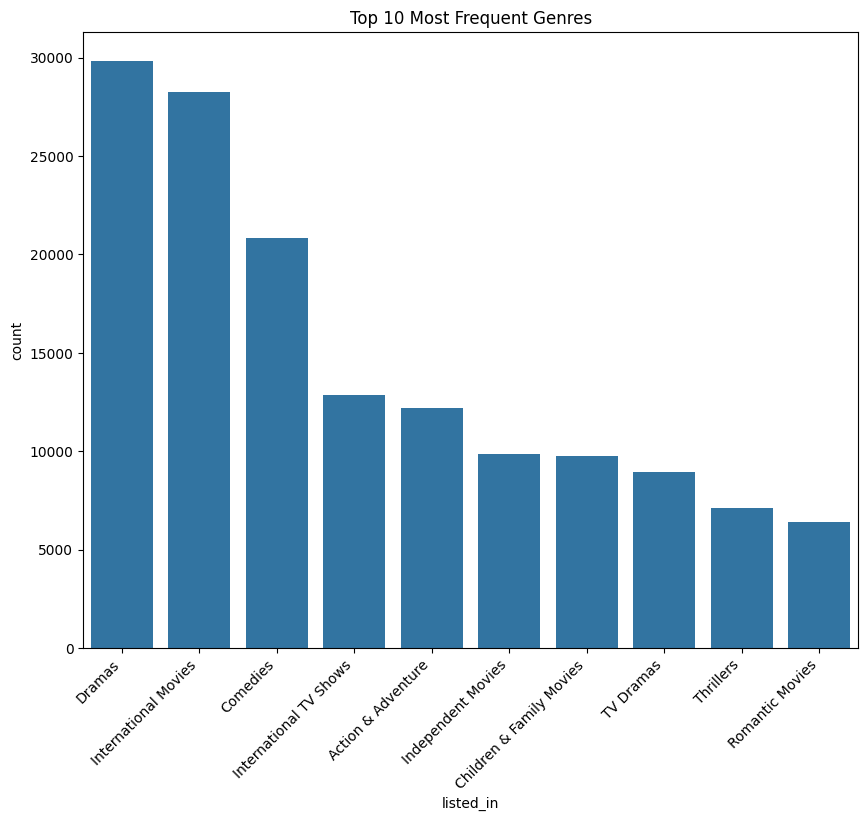

In [ ]:
# Creating a countplot for the top 10 most frequent genres
plt.figure(figsize=(10,8))
sns.countplot(data=df_final,x='listed_in',order=df_final['listed_in'].value_counts()[:10].index)
plt.title("Top 10 Most Frequent Genres")
plt.xticks(rotation=45,ha='right')
plt.show()

Observation: Dramas, International Movies, and Comedies are the top three most frequent genres, with Dramas accounting for about 15%, International Movies for about 14%, and Comedies for about 10%.

d) Country column

In [ ]:
country_counts=df_final['country'].value_counts()
country_percentages= (country_counts / country_counts.sum())*100
print(country_percentages)

country
United States      29.371737
India              11.290426
United Kingdom      6.416252
Unknown Country     5.940168
Japan               4.295153
                     ...    
Mongolia            0.000990
Armenia             0.000990
Kazakhstan          0.000495
Nicaragua           0.000495
Uganda              0.000495
Name: count, Length: 123, dtype: float64


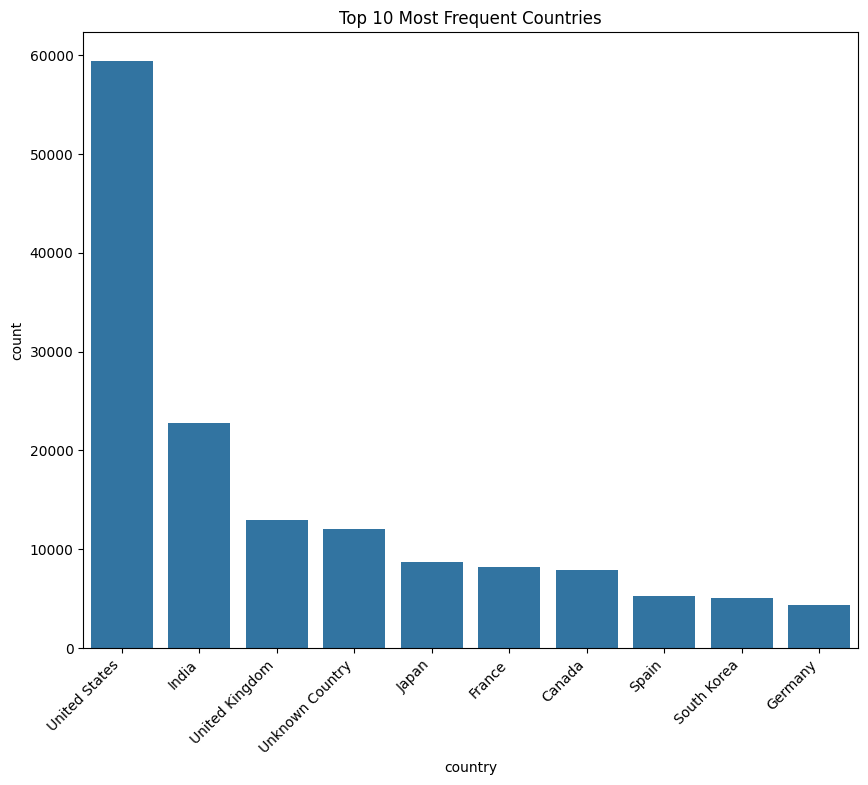

In [ ]:
# Creating a countplot for the top 10 most frequent countries
plt.figure(figsize=(10,8))
sns.countplot(data=df_final,x='country',order=df_final['country'].value_counts()[:10].index)
plt.title("Top 10 Most Frequent Countries")
plt.xticks(rotation=45,ha='right')
plt.show()

Observation: The United States is the most frequent country, accounting for about 29.37% of the data.

e) Cast column

In [ ]:
# Calculating the value counts for the 'cast' column, excluding 'Unknown Actor'
actors=df_final[df_final['cast']!="Unknown Actor"]
actors['cast'].value_counts()

cast
Liam Neeson        161
Alfred Molina      160
John Krasinski     139
Salma Hayek        130
Frank Langella     128
                  ... 
Peter Dunning        1
Drew Ray Tanner      1
Rena Strober         1
Valerie Arem         1
Chelsea Houska       1
Name: count, Length: 36439, dtype: int64

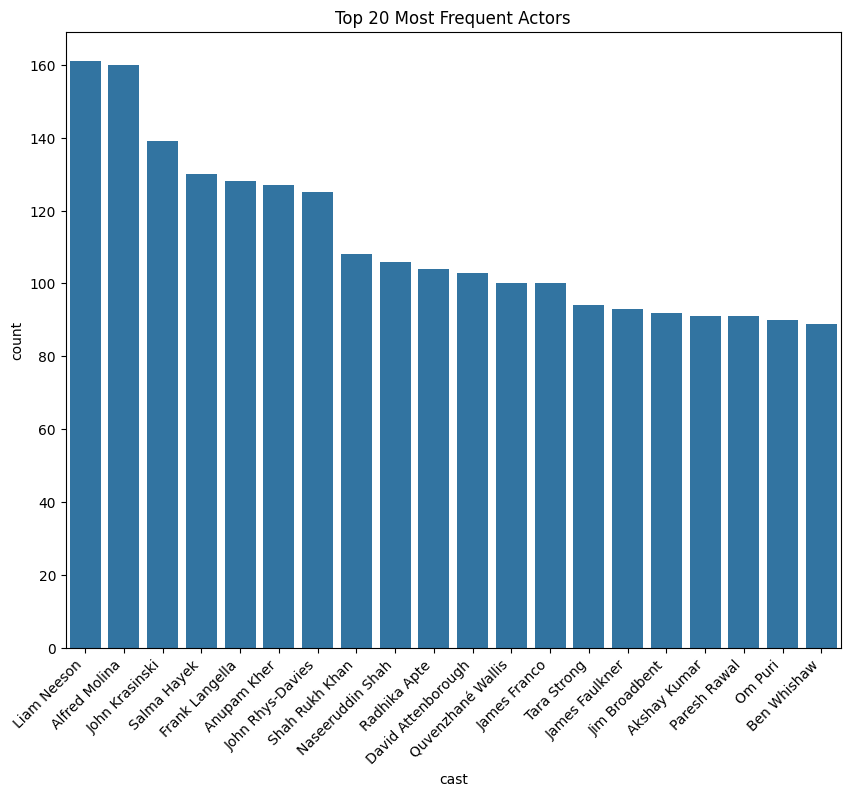

In [ ]:
# Creating a countplot for the top 20 most frequent actors excluding 'Unknown Actor'
plt.figure(figsize=(10,8))
sns.countplot(data=actors,x='cast',order=actors['cast'].value_counts()[:20].index)
plt.title("Top 20 Most Frequent Actors")
plt.xticks(rotation=45,ha='right')
plt.show()

Observation: Liam Neeson is the most frequent actor

f) Director column

In [ ]:
# Calculating the value counts for the 'director' column, excluding 'Unknown Director'
directors=df_final[df_final['director']!="Unknown Director"]
directors['director'].value_counts()

director
Martin Scorsese        419
Youssef Chahine        409
Cathy Garcia-Molina    356
Steven Spielberg       355
Lars von Trier         336
                      ... 
Brendon Marotta          1
Charlie Siskel           1
Adam Bolt                1
Anthony Palmer           1
Kirsten Johnson          1
Name: count, Length: 4993, dtype: int64

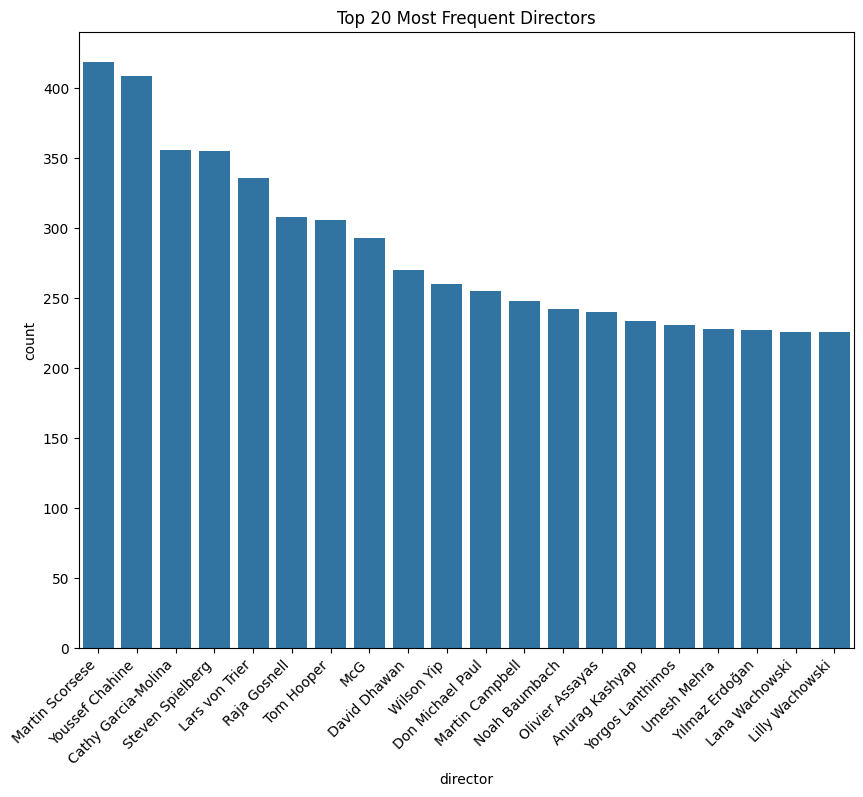

In [ ]:
# Creating a countplot for the top 20 most frequent directors excluding 'Unknown Director'
plt.figure(figsize=(10,8))
sns.countplot(data=directors,x='director',order=directors['director'].value_counts()[:20].index)
plt.title("Top 20 Most Frequent Directors")
plt.xticks(rotation=45,ha='right')
plt.show()

Observation: Martin Scorsese is the most frequent director

 # 2. Comparison of tv shows vs movies

a) Find the number of movies produced in each country and pick the top 10
countries

In [ ]:
# Filtering movies
movies=df_final[df_final['type']=='Movie']

# Calculating the movie count for each country and selecting the top 10 countries
top_10_countries=movies.groupby('country')['title'].nunique().reset_index().sort_values(by='title',ascending=False).head(10)
top_10_countries.rename(columns={'title':'no_of_movies'},inplace=True)
top_10_countries

,country,no_of_movies
110,United States,2752
41,India,962
109,United Kingdom,534
111,Unknown Country,446
18,Canada,319
32,France,303
34,Germany,182
97,Spain,171
49,Japan,119
21,China,114


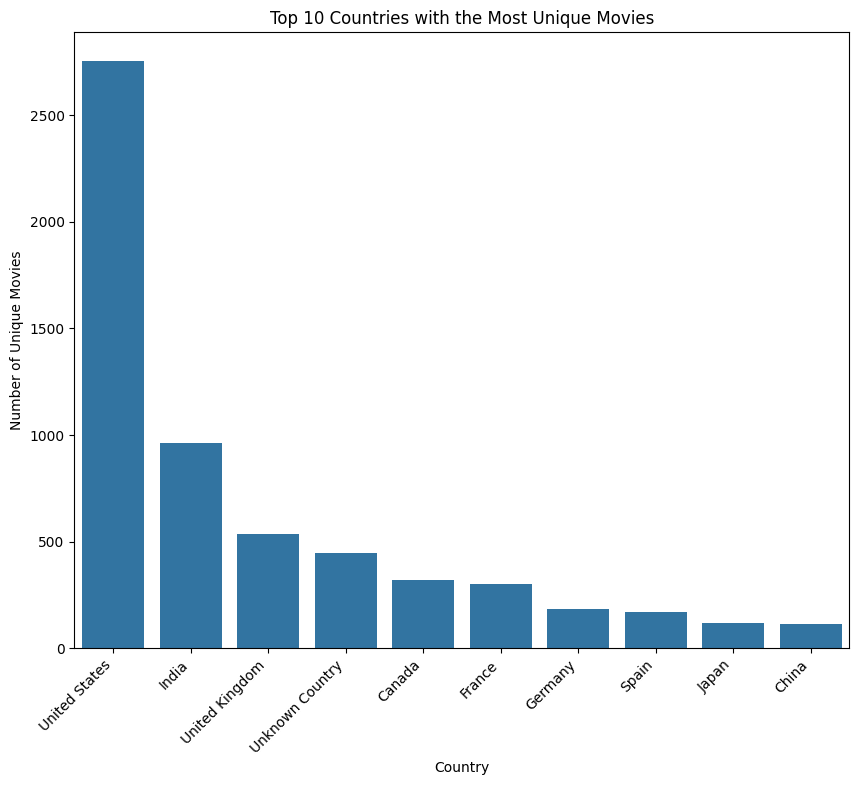

In [ ]:
# Creating a bar plot to visualize the number of unique movies in the top 10 countries
plt.figure(figsize=(10,8))
sns.barplot(data=top_10_countries,x='country',y='no_of_movies')
plt.title('Top 10 Countries with the Most Unique Movies')
plt.xlabel('Country')
plt.ylabel('Number of Unique Movies')
plt.xticks(rotation=45,ha='right')
plt.show()

Observation: The United States, India, and the United Kingdom are the top three countries producing the most number of unique movies

b) Find the number of Tv-Shows produced in each country and pick the top 10
countries

In [ ]:
# Filtering TV shows
tv_shows=df_final[df_final['type']=='TV Show']

# Calculating the TV show count for each country and selecting the top 10 countries
top_10_countries=tv_shows.groupby('country')['title'].nunique().reset_index().sort_values(by='title',ascending=False).head(10)
top_10_countries.rename(columns={'title':'no_of_tv_shows'},inplace=True)
top_10_countries

,country,no_of_tv_shows
62,United States,938
63,Unknown Country,392
61,United Kingdom,272
29,Japan,199
51,South Korea,170
7,Canada,126
18,France,90
24,India,84
56,Taiwan,70
1,Australia,66


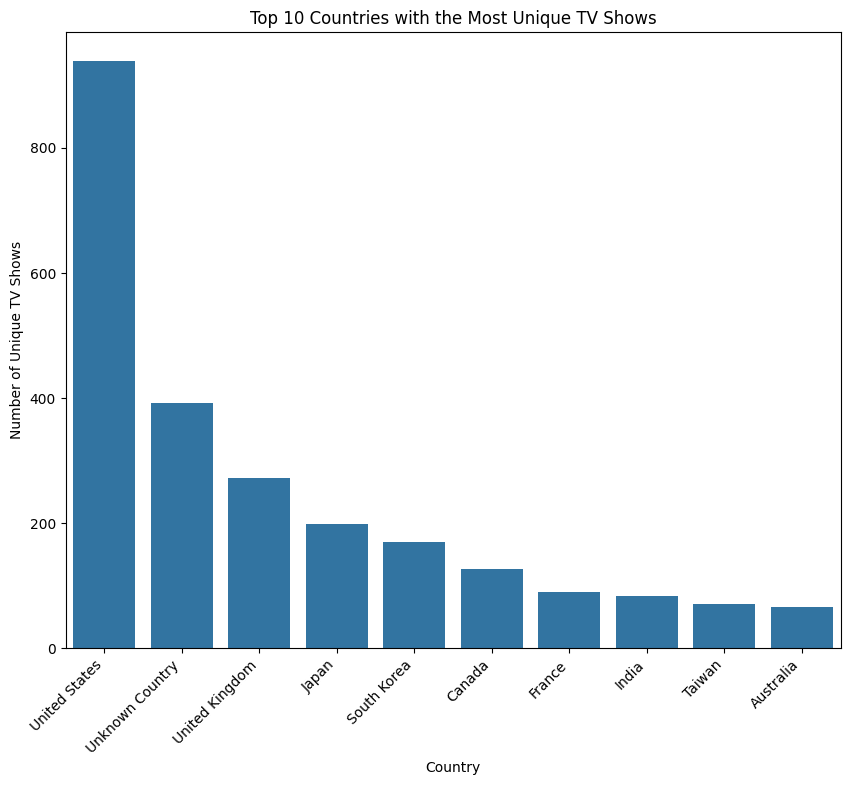

In [ ]:
# Creating a bar plot to visualize the number of unique Tv shows in the top 10 countries
plt.figure(figsize=(10,8))
sns.barplot(data=top_10_countries,x='country',y='no_of_tv_shows')
plt.title('Top 10 Countries with the Most Unique TV Shows')
plt.xlabel('Country')
plt.ylabel('Number of Unique TV Shows')
plt.xticks(rotation=45,ha='right')
plt.show()

Observation: The United States produces the highest number of unique TV shows

 # 3. What is the best time to launch a TV show?

a) Find which is the best week to release the Tv-show or the movie. Do the analysis
separately for Tv-shows and Movies

In [ ]:
# Extracting week and weekday information from the 'date_added' column for movies
movies['week']=movies['date_added'].dt.isocalendar().week
movies['weekday_name']=movies['date_added'].dt.day_name()

# Extracting week and weekday information from the 'date_added' column for TV shows
tv_shows['week']=tv_shows['date_added'].dt.isocalendar().week
tv_shows['weekday_name']=tv_shows['date_added'].dt.day_name()

In [ ]:
# Getting  the top 10 weeks with the highest movie counts
top_weeks_movies=movies.groupby('week')['title'].count().reset_index().sort_values(by='title',ascending=False).head(10)
top_weeks_movies.rename(columns={'title':'no_of_movies'},inplace=True)
top_weeks_movies

,week,no_of_movies
0,1,8456
43,44,5563
8,9,5094
34,35,5048
25,26,4931
39,40,4905
30,31,4388
26,27,3808
47,48,3737
17,18,3686


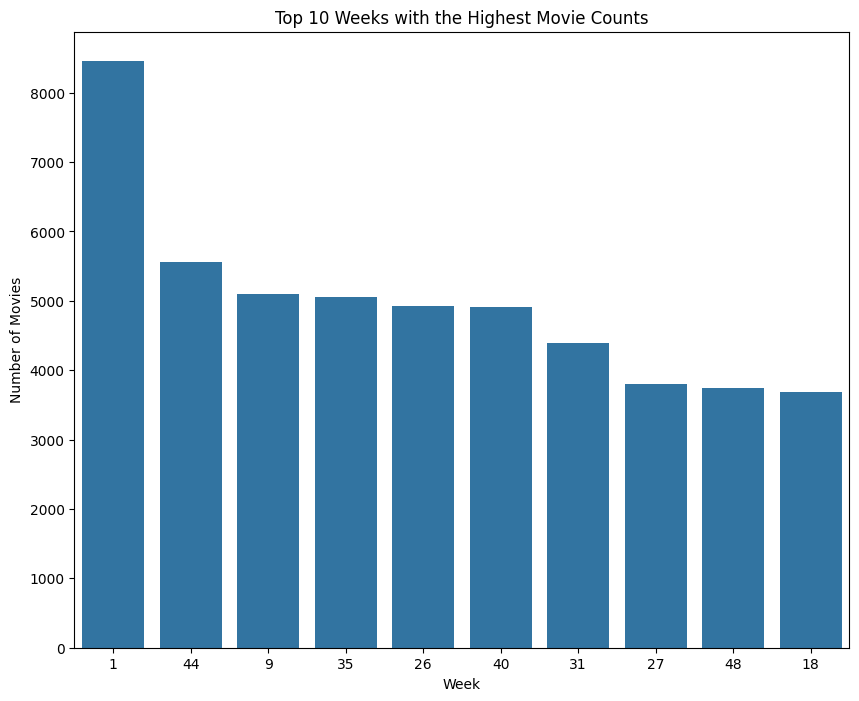

In [ ]:
# Creating a bar plot to visualize the number of movies in the top 10 weeks with the highest movie counts
plt.figure(figsize=(10,8))
sns.barplot(data=top_weeks_movies,x='week',y='no_of_movies',order=top_weeks_movies['week'])
plt.title('Top 10 Weeks with the Highest Movie Counts')
plt.xlabel('Week')
plt.ylabel('Number of Movies')
plt.show()

In [ ]:
# Getting the movie counts for each weekday
weekday_movie_counts=movies.groupby('weekday_name')['title'].count().reset_index().sort_values(by='title',ascending=False)
weekday_movie_counts.rename(columns={'title':'no_of_movies'},inplace=True)
weekday_movie_counts

,weekday_name,no_of_movies
0,Friday,36902
4,Thursday,24878
6,Wednesday,22500
5,Tuesday,17398
3,Sunday,15944
1,Monday,14681
2,Saturday,13614


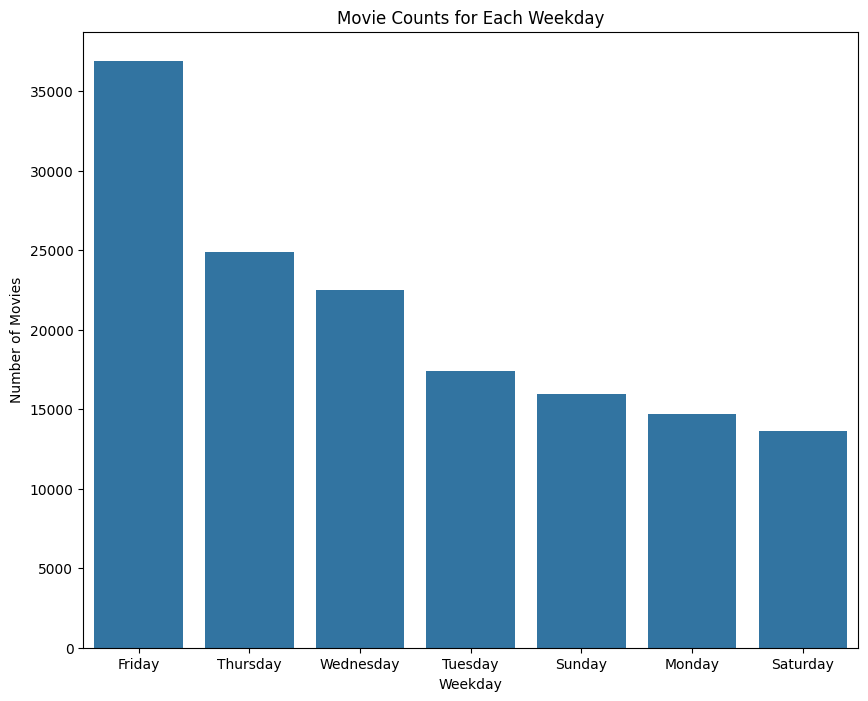

In [ ]:
# Creating a bar plot to visualize the number of movies per weekday
plt.figure(figsize=(10,8))
sns.barplot(data=weekday_movie_counts,x='weekday_name',y='no_of_movies',order=weekday_movie_counts['weekday_name'])
plt.title('Movie Counts for Each Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Movies')
plt.show()

Observations:


*   Most movies are released in the first week of the year
*   Most movies are released on Fridays



In [ ]:
# Getting  the top 10 weeks with the highest TV show counts
top_weeks_tv_shows=tv_shows.groupby('week')['title'].count().reset_index().sort_values(by='title',ascending=False).head(10)
top_weeks_tv_shows.rename(columns={'title':'no_of_tv_shows'},inplace=True)
top_weeks_tv_shows

,week,no_of_tv_shows
34,35,2010
26,27,1945
30,31,1739
23,24,1707
25,26,1574
12,13,1555
47,48,1496
4,5,1474
17,18,1416
39,40,1377


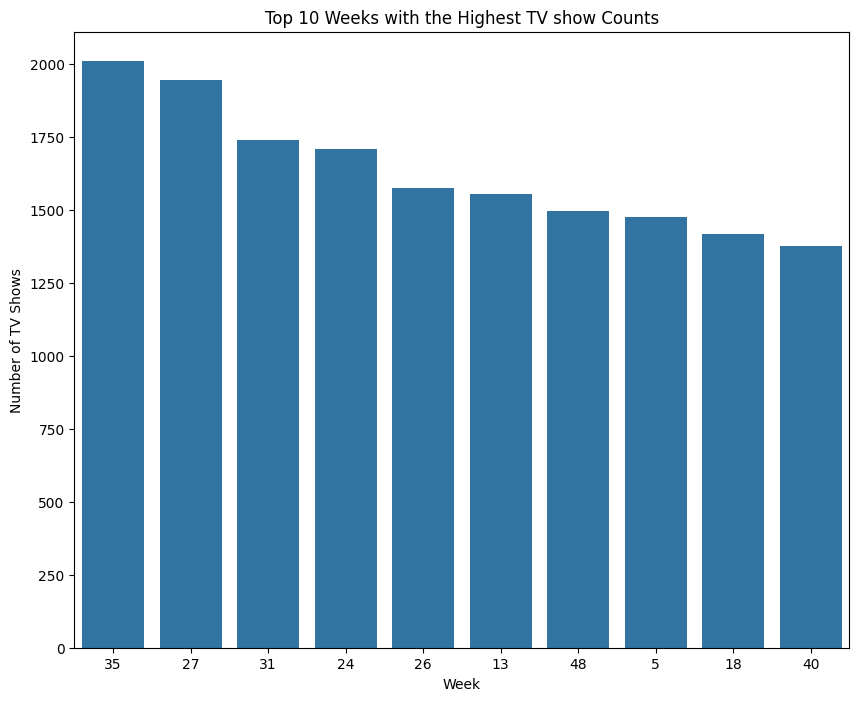

In [ ]:
# Creating a bar plot to visualize the number of TV shows in the top 10 weeks with the highest TV show counts
plt.figure(figsize=(10,8))
sns.barplot(data=top_weeks_tv_shows,x='week',y='no_of_tv_shows',order=top_weeks_tv_shows['week'])
plt.title('Top 10 Weeks with the Highest TV show Counts')
plt.xlabel('Week')
plt.ylabel('Number of TV Shows')
plt.show()

In [ ]:
# Getting the TV show counts for each weekday
weekday_tv_show_counts=tv_shows.groupby('weekday_name')['title'].count().reset_index().sort_values(by='title',ascending=False)
weekday_tv_show_counts.rename(columns={'title':'no_of_tv_shows'},inplace=True)
weekday_tv_show_counts

,weekday_name,no_of_tv_shows
0,Friday,21117
4,Thursday,8672
5,Tuesday,6620
6,Wednesday,6465
2,Saturday,5580
1,Monday,4418
3,Sunday,3276


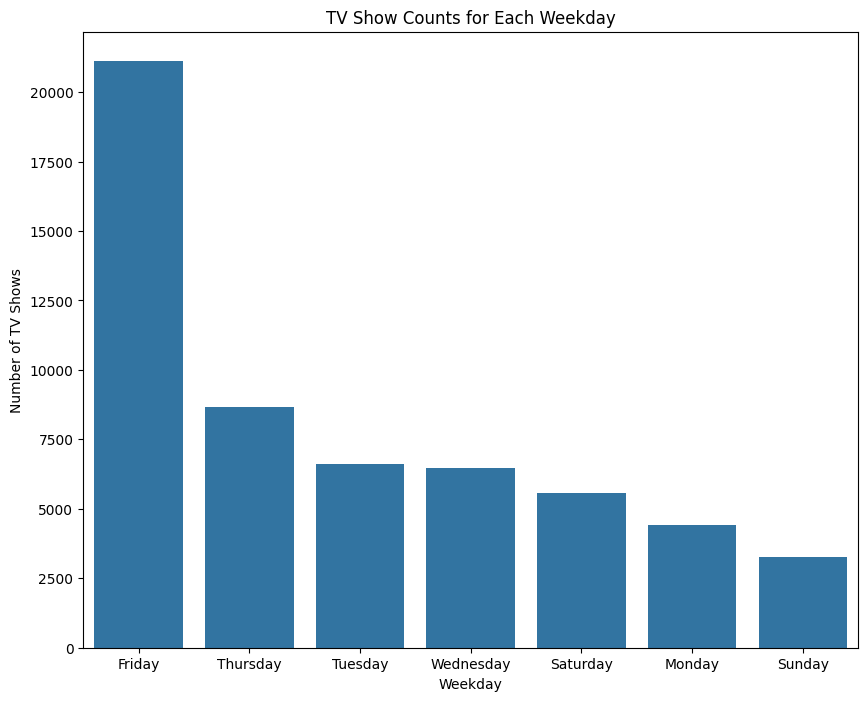

In [ ]:
# Creating a bar plot to visualize the number of TV shows per weekday
plt.figure(figsize=(10,8))
sns.barplot(data=weekday_tv_show_counts,x='weekday_name',y='no_of_tv_shows',order=weekday_tv_show_counts['weekday_name'])
plt.title('TV Show Counts for Each Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of TV Shows')
plt.show()

Observations:
*  Most TV shows are released in the 35th week of the year
*  Most TV shows are released on Fridays



b) Find which is the best month to release the Tv-show or the movie. Do the
analysis separately for Tv-shows and Movies

In [ ]:
# Extracting month information from the 'date_added' column for Movies and TV shows
movies['month']=movies['date_added'].dt.strftime("%B")
tv_shows['month']=tv_shows['date_added'].dt.strftime("%B")

In [ ]:
# Getting the movie counts for each month
monthly_movie_counts=movies.groupby('month')['title'].count().reset_index().sort_values(by='title',ascending=False)
monthly_movie_counts.rename(columns={'title':'no_of_movies'},inplace=True)
monthly_movie_counts

,month,no_of_movies
5,July,15075
4,January,13947
10,October,13541
11,September,13220
2,December,12768
0,April,12538
1,August,11924
6,June,11616
7,March,11507
9,November,11065


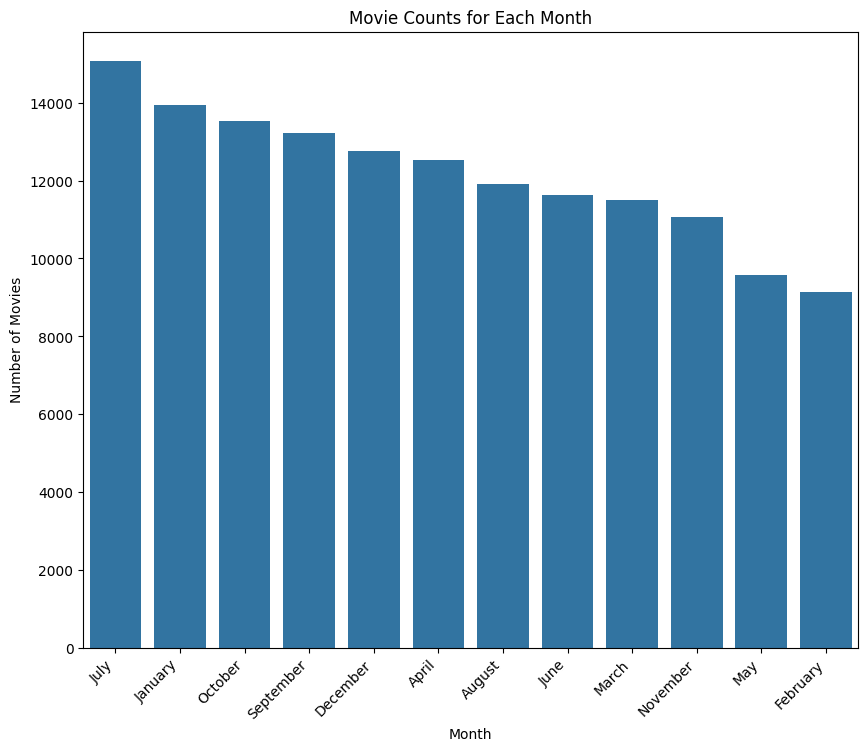

In [ ]:
# Creating a bar plot to visualize the number of movies per month
plt.figure(figsize=(10,8))
sns.barplot(data=monthly_movie_counts,x='month',y='no_of_movies',order=monthly_movie_counts['month'])
plt.title('Movie Counts for Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45,ha='right')
plt.show()

Observation: Most movies are released in July

In [ ]:
# Getting the TV show counts for each month
monthly_tv_show_counts=tv_shows.groupby('month')['title'].count().reset_index().sort_values(by='title',ascending=False)
monthly_tv_show_counts.rename(columns={'title':'no_of_tv_shows'},inplace=True)
monthly_tv_show_counts

,month,no_of_tv_shows
2,December,5489
1,August,5239
5,July,5174
6,June,5007
11,September,5005
0,April,4660
9,November,4525
8,May,4382
7,March,4310
10,October,4294


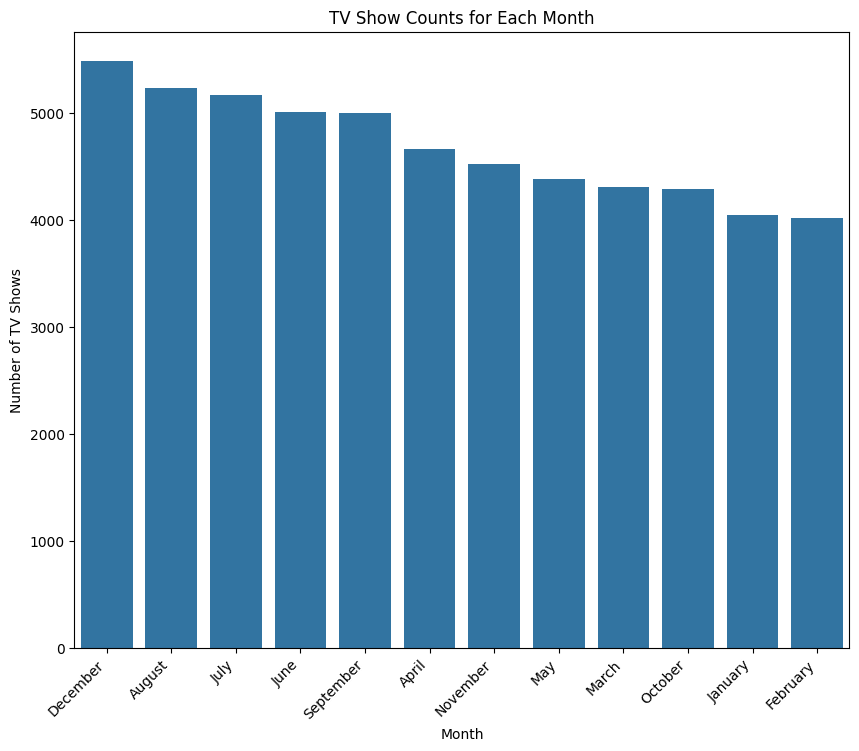

In [ ]:
# Creating a bar plot to visualize the number of TV shows per month
plt.figure(figsize=(10,8))
sns.barplot(data=monthly_tv_show_counts,x='month',y='no_of_tv_shows',order=monthly_tv_show_counts['month'])
plt.title('TV Show Counts for Each Month')
plt.xlabel('Month')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45,ha='right')
plt.show()

Observation: Most TV shows are released in December

 # 4. Analysis of actors/directors of different types of shows/movies

a) Identify the top 10 actors who have appeared in most movies or TV shows

In [ ]:
# Finding the top 10 actors who have appeared in the most unique movies or TV shows
top_10_actors=df_final.groupby('cast')['title'].nunique().reset_index().sort_values(by='title',ascending=False).head(11)
top_10_actors.rename(columns={'title':'no_of_movies/shows'},inplace=True)
top_10_actors

,cast,no_of_movies/shows
34214,Unknown Actor,825
2832,Anupam Kher,43
30489,Shah Rukh Khan,35
16697,Julie Tejwani,33
32591,Takahiro Sakurai,32
24215,Naseeruddin Shah,32
28974,Rupa Bhimani,31
845,Akshay Kumar,30
25424,Om Puri,30
35881,Yuki Kaji,29


In [ ]:
# Finding the top 10 actors who have appeared in the most unique movies
top_10_movie_actors=movies.groupby('cast')['title'].nunique().reset_index().sort_values(by='title',ascending=False).head(11)
top_10_movie_actors.rename(columns={'title':'no_of_movies'},inplace=True)
top_10_movie_actors

,cast,no_of_movies
24460,Unknown Actor,475
2104,Anupam Kher,42
21781,Shah Rukh Khan,35
17193,Naseeruddin Shah,32
18064,Om Puri,30
637,Akshay Kumar,30
12031,Julie Tejwani,28
1312,Amitabh Bachchan,28
18329,Paresh Rawal,28
20692,Rupa Bhimani,27


In [ ]:
# Finding the top 10 actors who have appeared in the most unique TV shows
top_10_tv_actors=tv_shows.groupby('cast')['title'].nunique().reset_index().sort_values(by='title',ascending=False).head(11)
top_10_tv_actors.rename(columns={'title':'no_of_shows'},inplace=True)
top_10_tv_actors

,cast,no_of_shows
13892,Unknown Actor,350
13230,Takahiro Sakurai,25
14581,Yuki Kaji,19
2873,Daisuke Ono,17
251,Ai Kayano,17
6804,Junichi Suwabe,17
14565,Yuichi Nakamura,16
6761,Jun Fukuyama,15
14497,Yoshimasa Hosoya,15
3126,David Attenborough,14


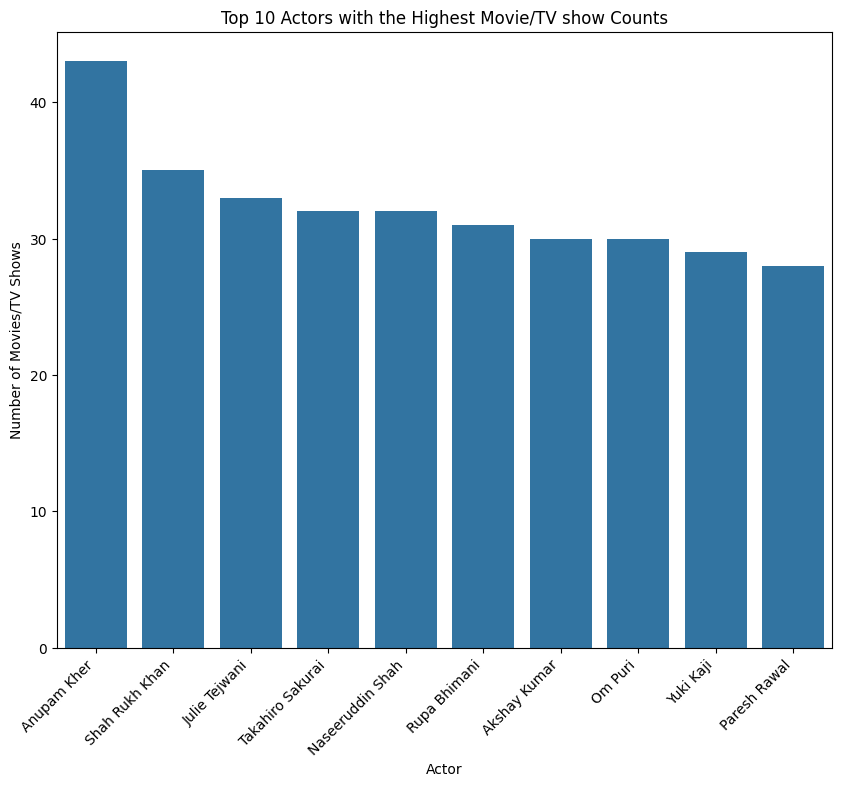

In [ ]:
# Creating a bar plot to visualize the top 10 actors who have appeared in most movies or TV shows

# Excluding the Unknown Actor
top_actors=top_10_actors[top_10_actors['cast']!="Unknown Actor"]

plt.figure(figsize=(10,8))
sns.barplot(data=top_actors,x='cast',y='no_of_movies/shows',order=top_actors['cast'])
plt.title('Top 10 Actors with the Highest Movie/TV show Counts')
plt.xlabel('Actor')
plt.ylabel('Number of Movies/TV Shows')
plt.xticks(rotation=45,ha='right')
plt.show()

Observations:
*   There are a total of 825 movies/shows for which the actor information is unknown
*   Anupam Kher appeared in the most movies
*   Takahiro Sakurai appeared in the most TV shows
*   Anupam Kher has the most appearances overall, including movies and TV shows





b) Identify the top 10 directors who have appeared in most movies or TV shows

In [ ]:
# Finding the top 10 directors who have directed the most unique movies or TV shows
top_10_directors=df_final.groupby('director')['title'].nunique().reset_index().sort_values(by='title',ascending=False).head(11)
top_10_directors.rename(columns={'title':'no_of_movies/shows'},inplace=True)
top_10_directors

,director,no_of_movies/shows
4744,Unknown Director,2634
3749,Rajiv Chilaka,22
1906,Jan Suter,21
3800,Raúl Campos,19
2866,Marcus Raboy,16
4457,Suhas Kadav,16
1954,Jay Karas,15
755,Cathy Garcia-Molina,13
1951,Jay Chapman,12
2945,Martin Scorsese,12


In [ ]:
# Finding the top 10 directors who have directed the most unique movies
top_10_movie_directors=movies.groupby('director')['title'].nunique().reset_index().sort_values(by='title',ascending=False).head(11)
top_10_movie_directors.rename(columns={'title':'no_of_movies'},inplace=True)
top_10_movie_directors

,director,no_of_movies
4539,Unknown Director,188
3582,Rajiv Chilaka,22
1817,Jan Suter,21
3633,Raúl Campos,19
4261,Suhas Kadav,16
2739,Marcus Raboy,15
1862,Jay Karas,15
727,Cathy Garcia-Molina,13
2815,Martin Scorsese,12
1859,Jay Chapman,12


In [ ]:
# Finding the top 10 directors who have directed the most unique TV shows
top_10_tv_directors=tv_shows.groupby('director')['title'].nunique().reset_index().sort_values(by='title',ascending=False).head(11)
top_10_tv_directors.rename(columns={'title':'no_of_shows'},inplace=True)
top_10_tv_directors

,director,no_of_shows
284,Unknown Director,2446
146,Ken Burns,3
8,Alastair Fothergill,3
259,Stan Lathan,2
128,Joe Berlinger,2
100,Hsu Fu-chun,2
84,Gautham Vasudev Menon,2
103,Iginio Straffi,2
168,Lynn Novick,2
251,Shin Won-ho,2


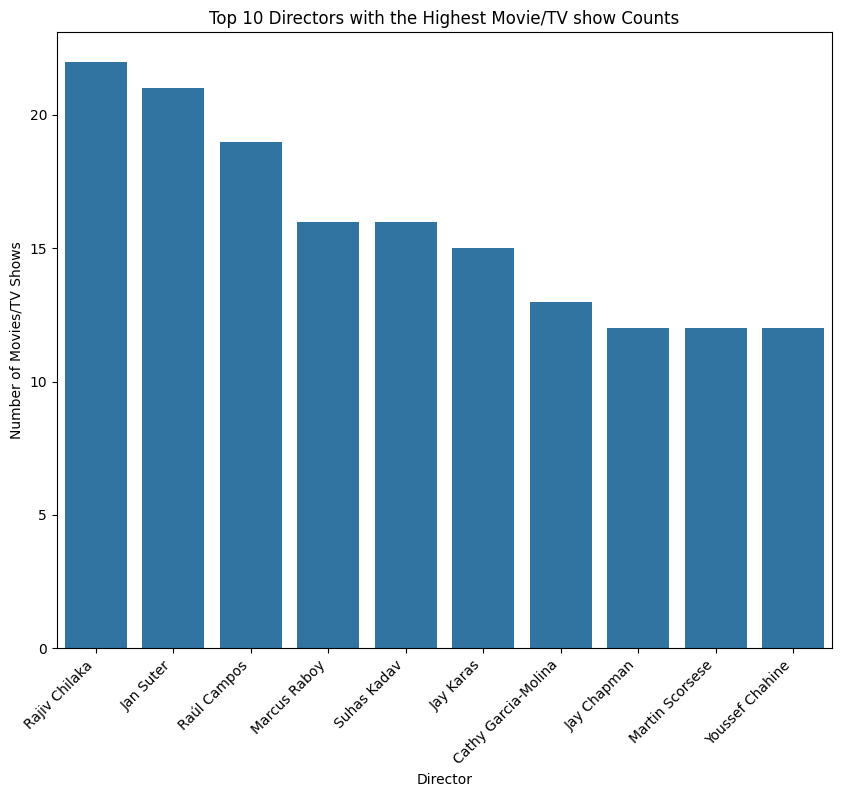

In [ ]:
# Creating a bar plot to visualize the top 10 directors who have directed the most movies or TV shows

# Excluding the Unknown Director
top_directors=top_10_directors[top_10_directors['director']!="Unknown Director"]

plt.figure(figsize=(10,8))
sns.barplot(data=top_directors,x='director',y='no_of_movies/shows',order=top_directors['director'])
plt.title('Top 10 Directors with the Highest Movie/TV show Counts')
plt.xlabel('Director')
plt.ylabel('Number of Movies/TV Shows')
plt.xticks(rotation=45,ha='right')
plt.show()

Observations:
*   There are a total of 2634 movies/shows for which the director information is unknown
*   Rajiv Chilaka directed the highest number of movies
*   Ken Burns and Alastair Fothergil directed the highest number of TV shows
*   Overall, Rajiv Chilaka has directed the most, including movies and TV shows







 # 5. Which genre movies are more popular or produced more?

In [ ]:
# Finding the top 10 movie genres
top_10_genres=movies.groupby('listed_in')['title'].nunique().reset_index().sort_values(by='title',ascending=False).head(10)
top_10_genres.rename(columns={'title':'no_of_movies'},inplace=True)
top_10_genres

,listed_in,no_of_movies
11,International Movies,2751
7,Dramas,2426
4,Comedies,1674
6,Documentaries,869
0,Action & Adventure,859
10,Independent Movies,756
2,Children & Family Movies,641
15,Romantic Movies,616
19,Thrillers,576
14,Music & Musicals,375


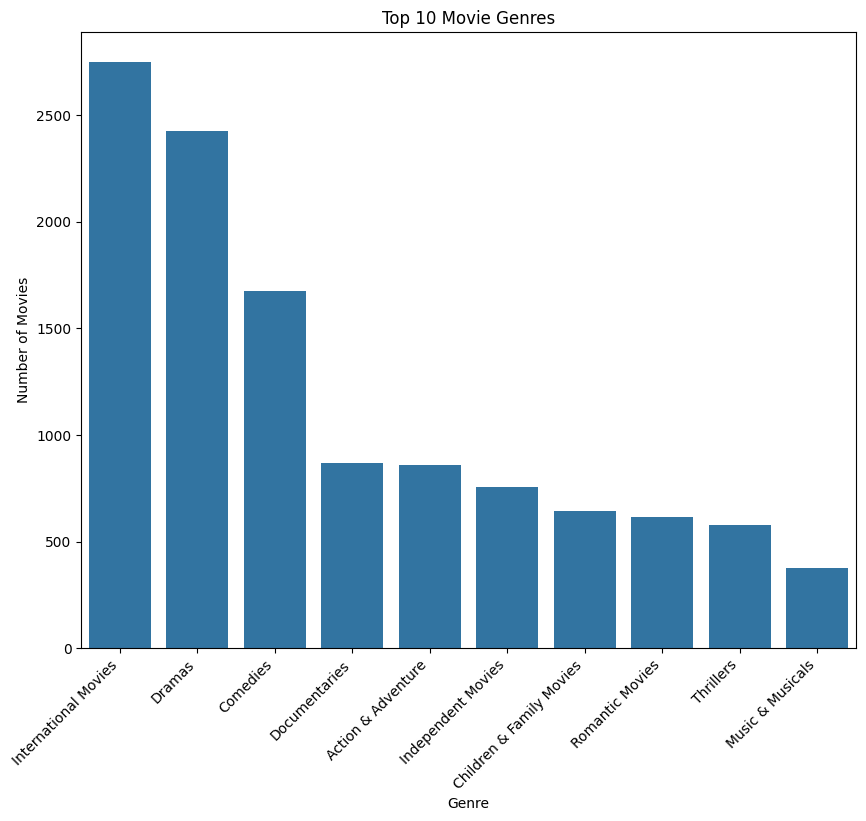

In [ ]:
# Creating a bar plot to visualize the top 10 movie genres
plt.figure(figsize=(10,8))
sns.barplot(data=top_10_genres,x='listed_in',y='no_of_movies',order=top_10_genres['listed_in'])
plt.title('Top 10 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45,ha='right')
plt.show()

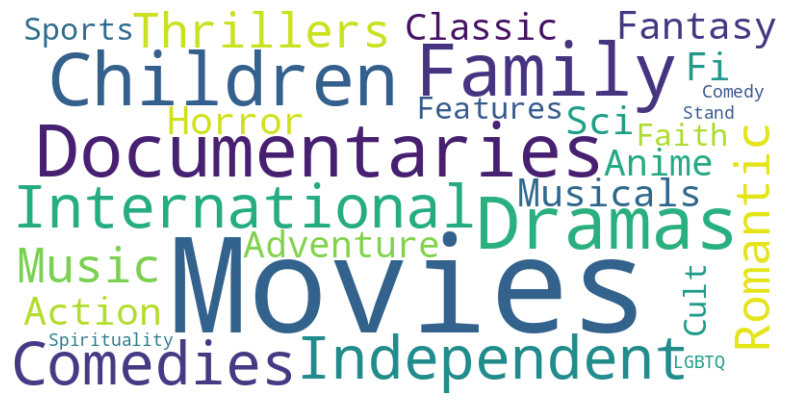

In [ ]:
# Plotting the Wordcloud with the genres of 'listed_in' column
# https://www.datacamp.com/tutorial/wordcloud-python
# https://www.geeksforgeeks.org/generating-word-cloud-python/

# Concatenating unique genre values
unique_genres=movies['listed_in'].unique()
genre_text = " ".join(unique_genres)

# Creating a WordCloud object
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(genre_text)

# Plotting the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Observation: International Movies,Dramas and Comedies are the most popular genres

 # 6. Find After how many days the movie will be added to Netflix after the release of the movie

In [ ]:
# Finding the Ranges of date_added and release_year columns
date_added_min=movies['date_added'].dt.year.min()
date_added_max=movies['date_added'].dt.year.max()
print(f"Date_added date range: {date_added_min} to {date_added_max}")

release_year_min=movies['release_year'].dt.year.min()
release_year_max=movies['release_year'].dt.year.max()
print(f"Release_year date range: {release_year_min} to {release_year_max}")

Date_added date range: 2008 to 2021
Release_year date range: 1942 to 2021


In [ ]:
# Finding the common date range to consider recent data
start_year=max(date_added_min,release_year_min)
end_year=min(date_added_max,release_year_max)
print(f"Common date range for recent data: {start_year} to {end_year}")

Common date range for recent data: 2008 to 2021


In [ ]:
# We will consider the data from 2008 to 2021
recent_movies=movies[(movies['release_year'].dt.year>=start_year) & (movies['release_year'].dt.year<=end_year)]

In [ ]:
# Calculating the difference in days
recent_movies['days_difference'] = (recent_movies['date_added'] - recent_movies['release_year']).dt.days

# Finding the mode of the differences
print(f"Mode = {recent_movies['days_difference'].mode().values[0]}")

# Finding the median of the differences
print(f"Median = {recent_movies['days_difference'].median()}")

Mode = 1369
Median = 757.0


Observations:
*   From the recent past, movies are most commonly added to Netflix approximately 1369 days after their release
*   From the recent past, movies are added to Netflix approximately 757 days after their release



 # 7. Analysis of Duration for Movies and TV Shows

In [ ]:
# Finding average duration for movies and tv shows
avg_movie_duration=movies['duration_new'].mean()
avg_tv_show_seasons=tv_shows['duration_new'].mean()

print(f"Average Movie duration: {avg_movie_duration} minutes")
print(f"Average TV Show Seasons: {avg_tv_show_seasons} seasons")

Average Movie duration: 106.83818883337788 minutes
Average TV Show Seasons: 1.9281007337750231 seasons


Observations:
*   The average duration for a movie is 107 minutes
*   The average number of seasons for a TV show is 2 seasons



# Insights:

* The dataset contains about 72% movies and 28% TV-shows.

*   TV-MA is the most frequent rating, indicating a preference for mature content.

*   The United States, India, and the United Kingdom are the top three countries producing the most unique movies

*  The United States produces the highest number of unique TV shows.

*   Most movies are released in the first week of the year, on Fridays, and in July.

*  Most TV shows are released in the 35th week of the year, on Fridays, and in December.

* There are 825 movies/shows for which the actor information is unknown and 2634 movies/shows for which the director information is unknown.

*  Anupam Kher appeared in the most movies, and Takahiro Sakurai appeared in the most TV shows.

*   Anupam Kher has the most appearances overall, including movies and TV shows.

*   Rajiv Chilaka directed the highest number of movies, and Ken Burns and Alastair Fothergil directed the highest number of TV shows.

*   Overall, Rajiv Chilaka has directed the most, including movies and TV shows.

*   International Movies, Dramas, and Comedies are the most popular genres.

*  The date_added range is from 2008 to 2021, and the release_year range is from 1942 to 2021.

*  From the recent past, movies are most commonly added to Netflix approximately 1,369 days after their release.

*  From the recent past, movies are added to Netflix approximately 757 days after their release.

*   The average duration for a movie is 107 minutes, and the average number of seasons for a TV show is 2 seasons






















# Recommendations:
* To better balance the content, it is recommended to add more TV show content.

* Given the popularity of Dramas, International Movies, and Comedies, consider investing more in the production of content within these genres.

* Collaborate with filmmakers, actors, and directors from the United States, India, and the United Kingdom to enhance the diversity and global appeal.

* Since most movies are released in the first week of the year, on Fridays, and in July, the release schedule should be planned accordingly to maximize audience engagement.For TV shows, focus on releases in the 35th week of the year, on Fridays, and in December.

* The prevalence of the TV-MA rating suggests a strong audience preference for mature content. Consider expanding the content library with more mature-themed movies and TV shows.

* Efforts to be made to gather more information about the actors for 825 movies/shows and more information about the directors for 2,634 movies/shows.

* Explore collaborations with actors like Anupam Kher and Takahiro Sakurai, considering their significant contributions.

* Engage with directors like Rajiv Chilaka, Ken Burns, and Alastair Fothergil to bring diverse and engaging content to the audience.

* Given the international popularity of genres like International Movies,Dramas and Comedies, emphasize the acquisition or production of content that resonates globally

* Recognizing the audience trend of favoring movies added to Netflix approximately 1369 days after release, focus on acquiring rights for films that have shown sustained popularity over time

* Given that the average duration for a movie is 107 minutes and that of a TV show is 2 seasons, aim for a diverse content library that includes both shorter and longer formats to cater to various audience preferences

